# Essential Functions in OpenCV

In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

plt.style.use(['dark_background'])

In [2]:
def show_img(img):
    cv2.imshow('', img)
    cv2.waitKey(0)

## Resize a image -- DownScale

In [3]:
def downScale_img(img, downScale=7):
    img = cv2.imread(img)

    width = img.shape[1]
    height = img.shape[0]

    width = width // downScale
    height = height // downScale
    dims = (width, height)

    img = cv2.resize(img, dims)
    
    return img

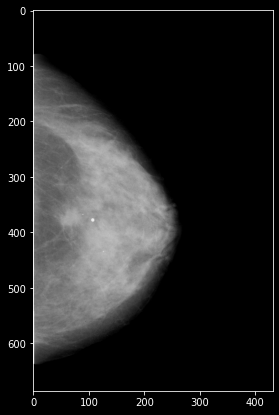

In [4]:
img1 = downScale_img(r"./images/full_mammography.jpg")
plt.rcParams["figure.figsize"] = (20, 7)
plt.imshow(img1)
# cv2.imshow('Full Mammography resize',img1)
# cv2.waitKey(0)

## Blur 

In [5]:
def blur_img(img, ksize=9):
    ks = (ksize, ksize)
    blur = cv2.GaussianBlur(img, ks, cv2.BORDER_DEFAULT)
    return blur

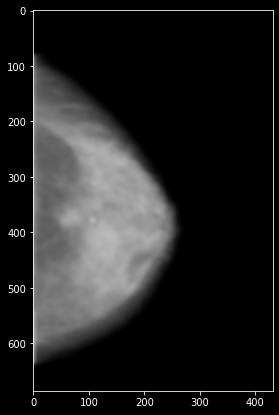

In [6]:
blur1 = blur_img(img1, ksize=13)
plt.rcParams["figure.figsize"] = (20, 7)
plt.imshow(blur1)

## Canny -- Detect the edges

cv2.Canny(image, T_lower, T_upper, aperture_size, L2Gradient)

Where: 

    Image: Input image to which Canny filter will be applied
    T_lower: Lower threshold value in Hysteresis Thresholding
    T_upper: Upper threshold value in Hysteresis Thresholding
    aperture_size: Aperture size of the Sobel filter.
    L2Gradient: Boolean parameter used for more precision in calculating Edge Gradient.

In [7]:
def canny_img(img, l_th1, up_th2, ap_size=5):
    cny = cv2.Canny(img, l_th1, up_th2, apertureSize=ap_size)
    return cny

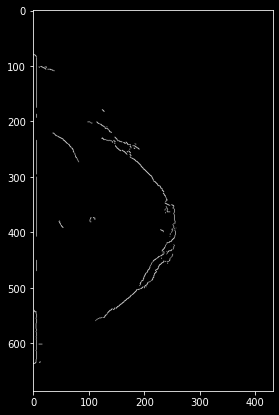

In [8]:
cny1 = canny_img(blur1, 600, 700)
plt.rcParams["figure.figsize"] = (20, 7)
plt.imshow(cny1, cmap='gray')



## Breast patch

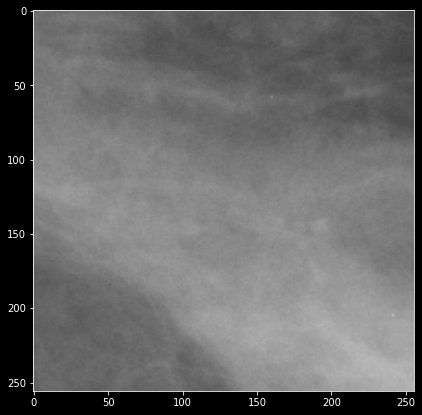

In [9]:
img_patch = cv2.imread("./images/patches/patch_1.jpeg")
plt.imshow(img_patch, cmap='gray')

In [10]:
# mod_blur = blur_img(img_patch, ksize=3)
# mod_cny = canny_img(mod_blur, l_th1=1, up_th2=20, ap_size=3)
# plt.imshow(mod_cny, cmap="gray")

### Contrast, Brightnness -- Breast X-ray patch tuning

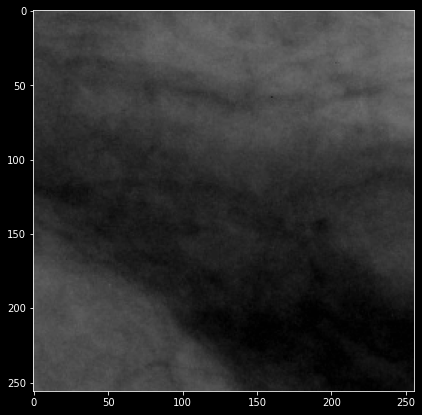

In [11]:
# final, th = cv2.threshold(img_patch, 150, 255, cv2.THRESH_BINARY)
# gray = cv2.cvtColor(img_patch, cv2.COLOR_BGR2GRAY)


alpha = 3 # Contrast control (1.0-3.0)
beta = -200 # Brightness control (0-100)

buf = cv2.addWeighted(img_patch, .4, img_patch, 0, 0.02)
adjusted = cv2.convertScaleAbs(buf, alpha=alpha, beta=beta)

plt.rcParams["figure.figsize"] = (20, 7)
plt.imshow(adjusted, cmap='gray')

### blur the patch

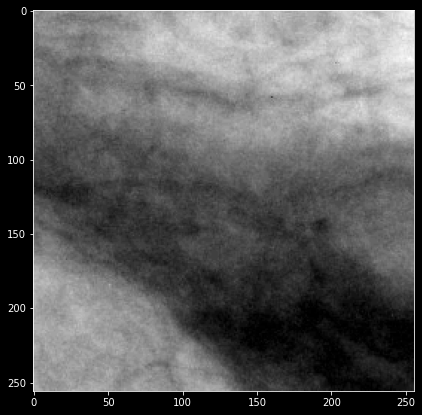

In [12]:
blur_patch = blur_img(adjusted, ksize=1)
gray = cv2.cvtColor(blur_patch, cv2.COLOR_BGR2GRAY)

# patch_cny = canny_img(blur_patch, l_th1=2, up_th2=50, ap_size=3)

plt.imshow(gray, cmap='gray')

### threshold

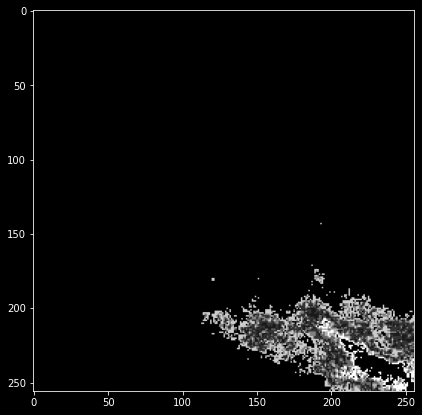

In [13]:
# ret, thresh1 = cv2.threshold(gray, 8, 255, cv2.THRESH_TOZERO_INV)
ret, thresh1 = cv2.threshold(gray, 10, 255, cv2.THRESH_TOZERO_INV)

plt.imshow(thresh1, cmap='gray')

In [14]:
thresh1.sum()

24169

### morphing

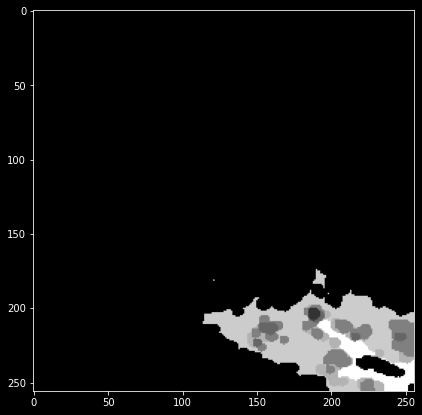

In [15]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6,6))
morph = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)

plt.imshow(morph, cmap="gray")

### contour

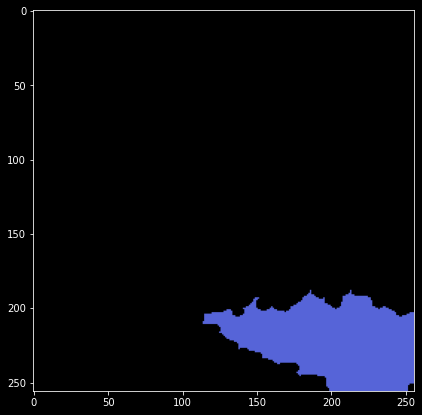

In [16]:
# get largest contour
contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
big_contour = max(contours, key=cv2.contourArea)

# draw largest contour as white filled on black background as mask
mask = np.zeros(img_patch.shape, dtype=np.uint8)
cv2.drawContours(mask, [big_contour], 0, (86, 100, 216), cv2.FILLED)

plt.imshow(mask)

### masking

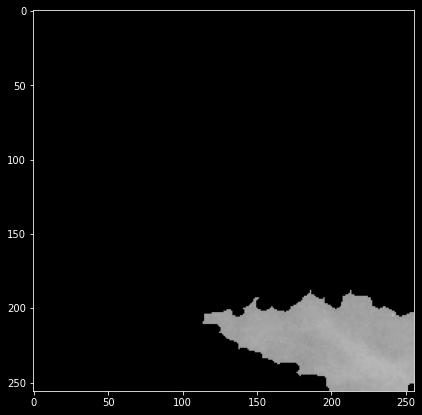

In [17]:
#masking
result = cv2.bitwise_and(img_patch, img_patch, mask=mask[:,:,2])
plt.imshow(result)

### canny

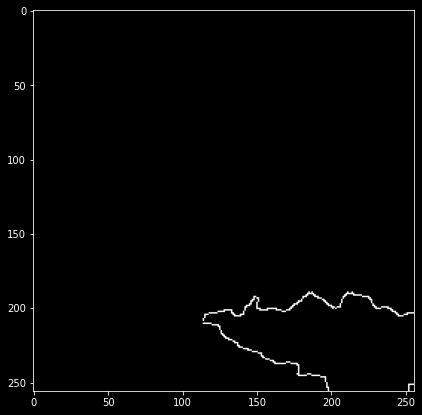

In [18]:
blur_patch = blur_img(mask, ksize=3)
patch_cny = canny_img(blur_patch, l_th1=30, up_th2=60, ap_size=7)

k = 7
kernel = (k,k)
patch_dilated = cv2.dilate(patch_cny, kernel, iterations = 2)
# patch_erode = cv2.erode(patch_dilated, kernel, iterations = 3)

plt.imshow(patch_cny, cmap='gray')

### Normal plot of Patches

In [19]:
import os

patches_path = r"E:/Data Science/OpenCV/images/patches/"

if os.path.isdir(patches_path):
    files = os.listdir(patches_path)
    files.sort()
    # print(files)

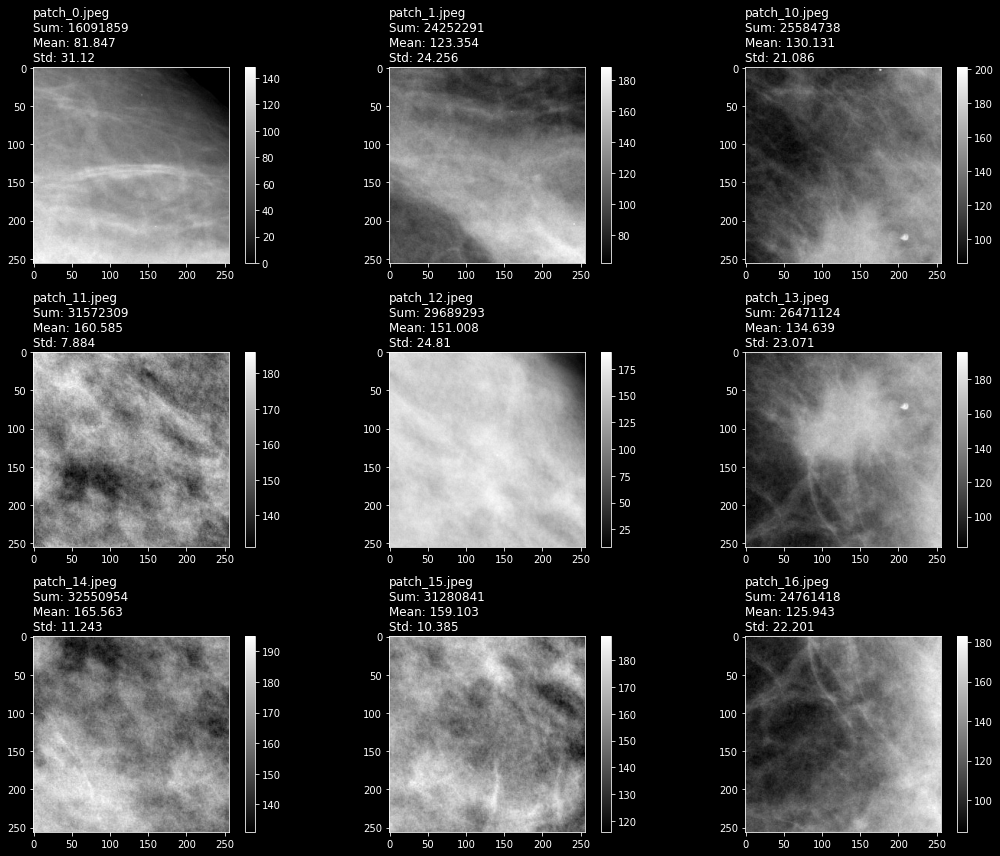

In [20]:
count = 0
plt.style.use(['dark_background'])
plt.figure(figsize=(15, 12))
for i in range(0, 9):
    # ext = files[i].split(".")[1]
    # files[i]


    # for img in range(0, 20):
    # print(count)
    plt.subplot(3, 3, count+1) #(row, col)
    img = cv2.imread(patches_path+files[i])
    # if np.mean(img) >= 50:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.colorbar()
    plt.title(files[i] + "\nSum: " + str(img.sum()) + "\nMean: " + str(round(np.mean(img), 3)) + "\nStd: " + str(round(np.std(img), 3)), loc='left')
    count+=1
plt.tight_layout()
plt.show()

### Canny plot of Patches

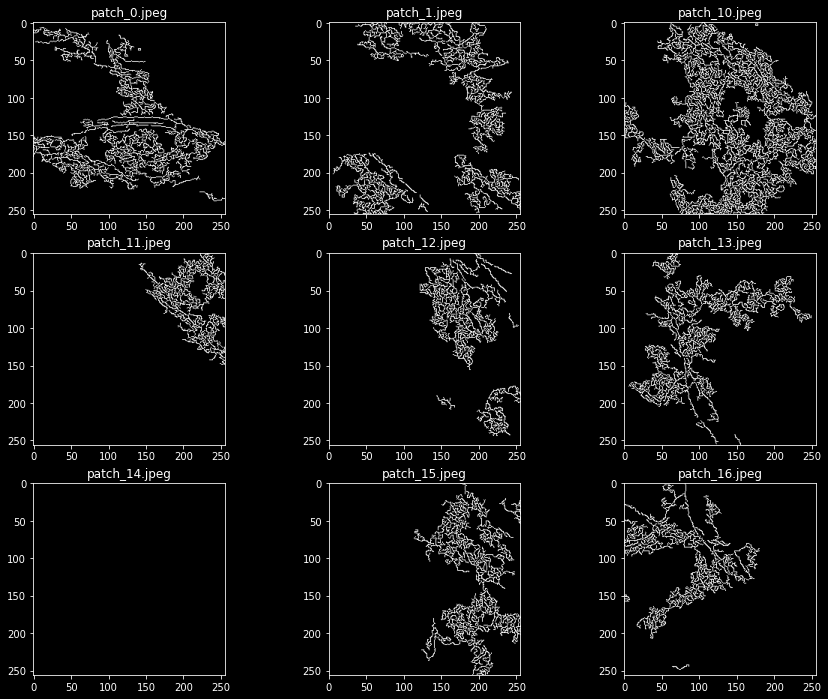

In [21]:
count = 0
plt.style.use(['dark_background'])
plt.figure(figsize=(15, 12))
for i in range(0, 9):
    # ext = files[i].split(".")[1]
    # files[i]


    # for img in range(0, 20):
    # print(count)
    plt.subplot(3, 3, count+1) #(row, col)
    img = cv2.imread(patches_path+files[i])


    # blur_patch = blur_img(img, ksize=3)
    patch_cny = canny_img(img, l_th1=10, up_th2=900, ap_size=5)

    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # plt.imshow(p_arr[img], cmap ='binary')
    plt.imshow(patch_cny, cmap ='gray')

    plt.title(files[i])
    # plt.tight_layout()
    count+=1
plt.show()

### Image enhancement plot of Patches

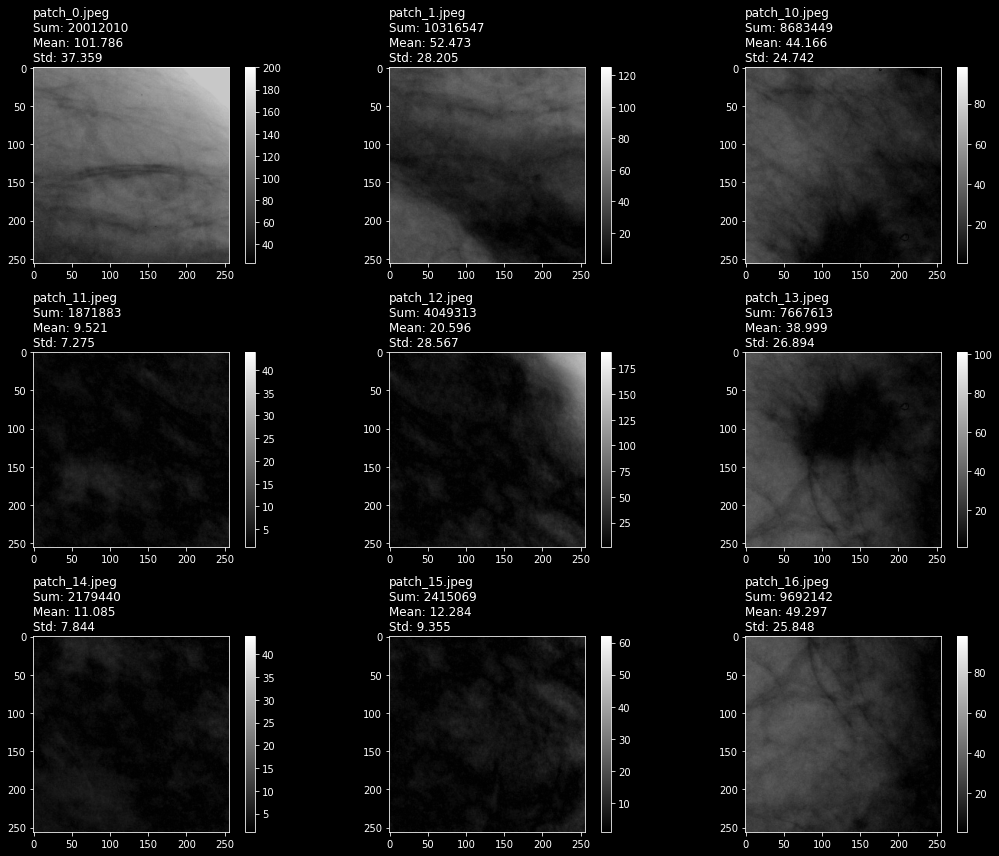

In [28]:
count = 0
plt.style.use(['dark_background'])
plt.figure(figsize=(15, 12))
for i in range(0, 9):
    # ext = files[i].split(".")[1]
    # files[i]


    # for img in range(0, 20):
    # print(count)
    plt.subplot(3, 3, count+1) #(row, col)
    img = cv2.imread(patches_path+files[i])


    # blur_patch = blur_img(img, ksize=3)
    alpha = 3 # Contrast control (1.0-3.0)
    beta = -200

    buf = cv2.addWeighted(img, .4, img_patch, 0, 0.02)
    adjusted = cv2.convertScaleAbs(buf, alpha=alpha, beta=beta)

    
#     blur_patch = blur_img(adjusted, ksize=1)
#     gray = cv2.cvtColor(blur_patch, cv2.COLOR_BGR2GRAY)
    
#     ret, thresh1 = cv2.threshold(gray, 18, 255, cv2.THRESH_TOZERO_INV)
    
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # plt.imshow(p_arr[img], cmap ='binary')
    plt.imshow(adjusted, cmap ='gray')
    plt.colorbar()
    plt.title(files[i] + "\nSum: " + str(adjusted.sum()) + "\nMean: " + str(round(np.mean(adjusted), 3)) + "\nStd: " + str(round(np.std(adjusted), 3)), loc='left')

    count+=1
plt.tight_layout()
plt.show()

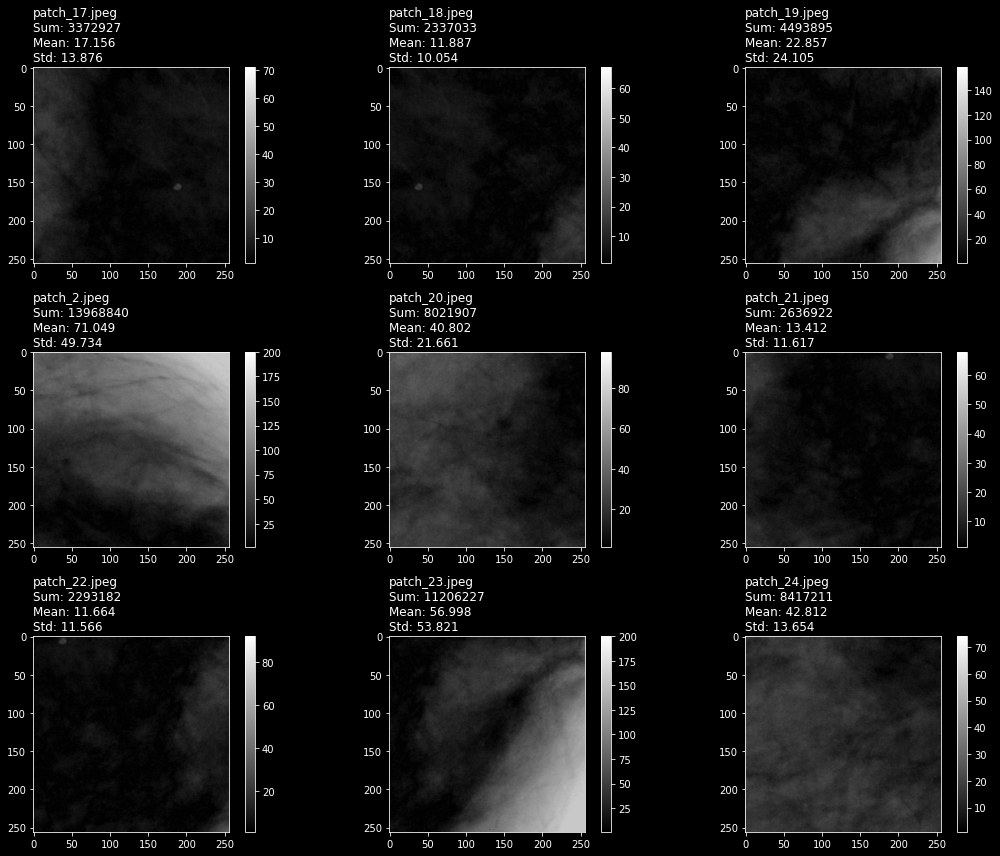

In [23]:
count = 0
plt.style.use(['dark_background'])
plt.figure(figsize=(15, 12))
for i in range(9, 18):
    # ext = files[i].split(".")[1]
    # files[i]


    # for img in range(0, 20):
    # print(count)
    plt.subplot(3, 3, count+1) #(row, col)
    img = cv2.imread(patches_path+files[i])


    # blur_patch = blur_img(img, ksize=3)
    alpha = 3 # Contrast control (1.0-3.0)
    beta = -200

    buf = cv2.addWeighted(img, .4, img_patch, 0, 0.02)
    adjusted = cv2.convertScaleAbs(buf, alpha=alpha, beta=beta)

    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # plt.imshow(p_arr[img], cmap ='binary')
    plt.imshow(adjusted, cmap ='gray')
    plt.colorbar()
    plt.title(files[i] + "\nSum: " + str(adjusted.sum()) + "\nMean: " + str(round(np.mean(adjusted), 3)) + "\nStd: " + str(round(np.std(adjusted), 3)), loc='left')

    count+=1
plt.tight_layout()
plt.show()

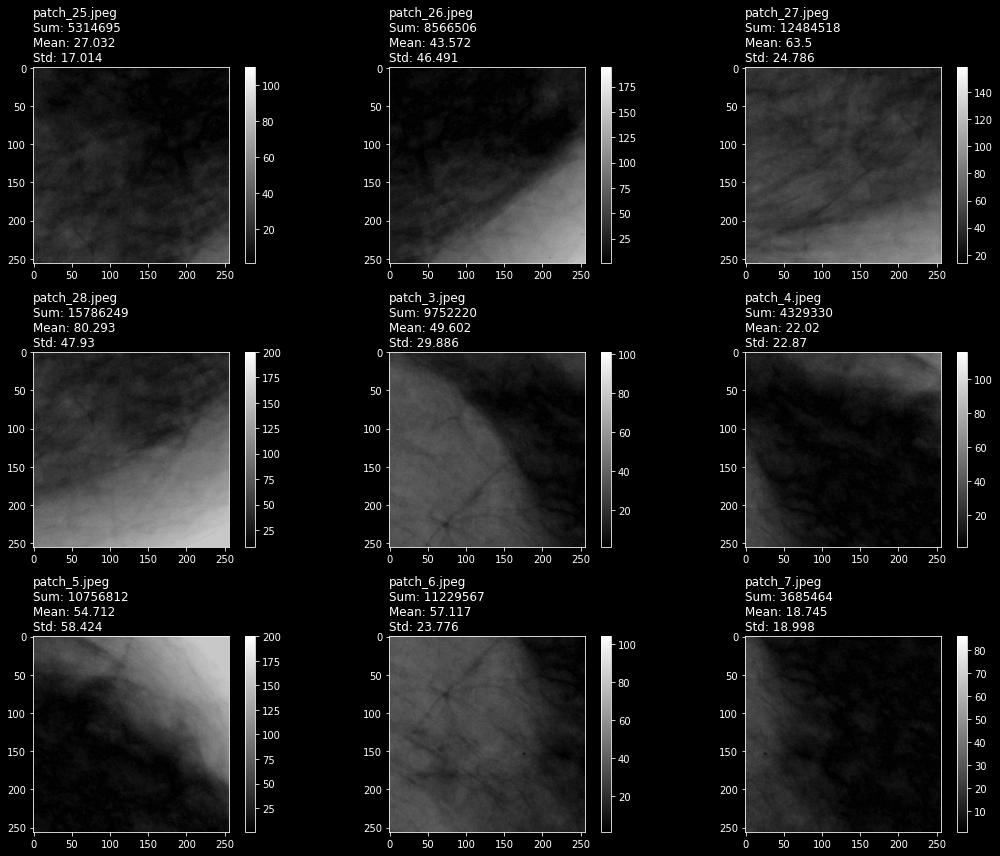

In [ ]:
count = 0
plt.style.use(['dark_background'])
plt.figure(figsize=(15, 12))
for i in range(18, 27):
    # ext = files[i].split(".")[1]
    # files[i]


    # for img in range(0, 20):
    # print(count)
    plt.subplot(3, 3, count+1) #(row, col)
    img = cv2.imread(patches_path+files[i])


    # blur_patch = blur_img(img, ksize=3)
    alpha = 3 # Contrast control (1.0-3.0)
    beta = -200

    buf = cv2.addWeighted(img, .4, img_patch, 0, 0.02)
    adjusted = cv2.convertScaleAbs(buf, alpha=alpha, beta=beta)

    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # plt.imshow(p_arr[img], cmap ='binary')
    plt.imshow(adjusted, cmap ='gray')
    plt.colorbar()
    plt.title(files[i] + "\nSum: " + str(adjusted.sum()) + "\nMean: " + str(round(np.mean(adjusted), 3)) + "\nStd: " + str(round(np.std(adjusted), 3)), loc='left')

    count+=1
plt.tight_layout()
plt.show()

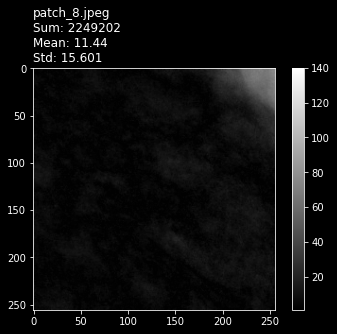

In [28]:
count = 0
plt.style.use(['dark_background'])
plt.figure(figsize=(15, 12))
for i in range(27, 28):
    # ext = files[i].split(".")[1]
    # files[i]


    # for img in range(0, 20):
    # print(count)
    plt.subplot(3, 3, count+1) #(row, col)
    img = cv2.imread(patches_path+files[i])


    # blur_patch = blur_img(img, ksize=3)
    alpha = 3 # Contrast control (1.0-3.0)
    beta = -200

    buf = cv2.addWeighted(img, .4, img_patch, 0, 0.02)
    adjusted = cv2.convertScaleAbs(buf, alpha=alpha, beta=beta)

    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # plt.imshow(p_arr[img], cmap ='binary')
    plt.imshow(adjusted, cmap ='gray')
    plt.colorbar()
    plt.title(files[i] + "\nSum: " + str(adjusted.sum()) + "\nMean: " + str(round(np.mean(adjusted), 3)) + "\nStd: " + str(round(np.std(adjusted), 3)), loc='left')

    count+=1
plt.tight_layout()
plt.show()